In [1]:
!pip install mglearn

     |████████████████████████████████| 542kB 5.1MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=981b93c2321837eb8fad4c563f3b8c4fc4b1d3d7d5472a50969e41fec3d051ec
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
#질문

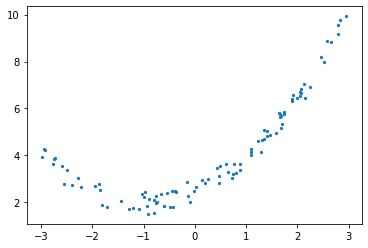

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 100
x = 6 * np.random.rand(n, 1) - 3
y = 0.5 * x**2 + 1 * x + 2 + np.random.rand(n, 1)

#선그릴 데이터를 그냥 만든거.

plt.scatter(x, y, s=5)

#이거 왜 이렇게 하는거임?

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
x_poly.shape, x.shape


#이건 정확히 뭐해주는 거임?

((100, 2), (100, 1))

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_poly, y)
model.coef_, model.intercept_
# y = 0.5 * x**2 + 1 * x + 2

#대충 모델에 적용해서 예측하는 것 같음.

(array([[0.99199761, 0.51846254]]), array([2.47262685]))

In [ ]:
#다항회귀는 x 를 제곱 해주는 거고
#현재 맛보기 정도로만 진행을 한 것임.

In [2]:
#현재 이런틀에서 많이 벗어나지 않는다고 함.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import mglearn

X, y = mglearn.datasets.make_wave(60)
# plt.scatter(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#랜덤 스테이트 42, 0아니면 42로 그냥 쓰래요.

model = LinearRegression()
model.fit(X_train, y_train)

print('가중치(계수, 기울기, w):', model.coef_)
print('편향(절편, b):', model.intercept_)

print('훈련 점수:', model.score(X_train, y_train))
print('테스트 점수:', model.score(X_test, y_test))


가중치(계수, 기울기, w): [0.39390555]
편향(절편, b): -0.031804343026759746
훈련 점수: 0.6700890315075756
테스트 점수: 0.65933685968637


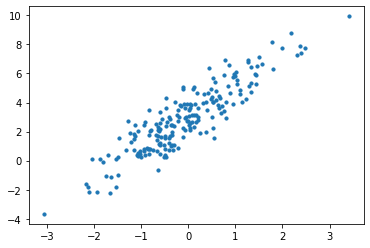

In [3]:
#변수가 한개인 경우

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 계수 및 절편
# 노이즈
n_samples = 200
x = np.random.randn(n_samples)
w = 2
#기울기
b = 3
#절편
y = w * x + (b + np.random.randn(n_samples))
#노이즈를 주지 않으면 선모양으로 나타날것임, random.randn을 통해 노이즈를 줌

#질문 왜 뒤에 np임?
#b값이 편향 절편이라고 해서 이동하는 값, b값에 적용을 해줬다고 생각하면 되는것!
#y값이 위아래로 더 많이 흔들림.

plt.scatter(x, y, s=10)

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
model.coef_, model.intercept_
#니가 쓴 내용은 1차원이고, 2차원의 모양으로 만들어라. 좋은말 할때.

(array([2.06581]), 3.06330900048749)

In [8]:
#변수가 2개일때

n_samples = 200
x1 = np.random.randn(n_samples)
x2 = np.random.randn(n_samples)
y = 2 * x1 + 3 * x2 + 4 + np.random.randn(n_samples)
#다변수
#변수의 종류에 따라서...
#임의로 2와 3을 부여함 4인 편향도 임의로 제공한것임 강사님이.

#왜 2*x1 + 3*x2인가요? 가중치와 절편아닌가요?

X = pd.DataFrame({'x1':x1, 'x2':x2})
model = LinearRegression()
model.fit(X, y)
model.coef_, model.intercept_

#선모양의 기울기를 구해주는게 리니어 레그레이션이라네.

(array([1.87296343, 2.97563298]), 4.0317977022646305)

In [ ]:
#실습 4

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
from sklearn.datasets import load_boston

boston = load_boston()
boston.keys()
# print( boston.DESCR )
boston.data.shape

#보스턴 자료를 가져온 것 같음.

(506, 13)

In [27]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [14]:
# 데이터 세트 DataFrame 변환
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [17]:
df['PRICE']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [18]:
# 훈련 데이터와 테스트 데이터 준비
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
print(X)
print(y)

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x 13 columns]
0      24.0
1  

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
y_train

In [28]:
# 모델 선택과 학습
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
print('훈련 점수:', model.score(X_train, y_train) )
print('테스트 점수:', model.score(X_test, y_test) )

훈련 점수: 0.7697699488741149
테스트 점수: 0.635463843320211


In [29]:
# 예측/평가(회귀)
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2score = r2_score(y_test, y_pred)
#그냥 스코어 값임! 결정계수 아님!

print(f'MSE:{mse:.3f}, RMSE:{rmse:.3f}, R2SCORE:{r2score:.3f}')

#mse 평균제곱오차

MSE:29.782, RMSE:5.457, R2SCORE:0.635


In [30]:
y_pred #예측값

array([24.95233283, 23.61699724, 29.20588553, 11.96070515, 21.33362042,
       19.46954895, 20.42228421, 21.52044058, 18.98954101, 19.950983  ,
        4.92468244, 16.09694058, 16.93599574,  5.33508402, 39.84434398,
       32.33549843, 22.32772572, 36.54017819, 31.03300611, 23.32172503,
       24.92086498, 24.26106474, 20.71504422, 30.45072552, 22.45009234,
        9.87470006, 17.70324412, 17.974775  , 35.69932012, 20.7940972 ,
       18.10554174, 17.68317865, 19.71354713, 23.79693873, 29.06528958,
       19.23738284, 10.97815878, 24.56199978, 17.32913052, 15.20340817,
       26.09337458, 20.87706795, 22.26187518, 15.32582693, 22.85847963,
       25.08887173, 19.74138819, 22.70744911,  9.66708558, 24.46175926,
       20.72654169, 17.52545047, 24.45596997, 30.10668865, 13.31250981,
       21.52052342, 20.65642932, 15.34285652, 13.7741129 , 22.07429287,
       17.53293957, 21.60707766, 32.91050188, 31.32796114, 17.64346364,
       32.69909854, 18.56579207, 19.32110821, 18.81256692, 23.04

In [31]:
mse #평균제곱오차값

#(실제값 - 예측값) ^2 /크기(데이터전체크기)
#비용함수라고도 함

29.782245092302524

In [32]:
rmse #평균 제곱근 편차 / 루트해준거임.

5.457311159564069

In [33]:
r2score #결정계수

#회기식의 적합도를 재는 척도

0.635463843320211

In [34]:
# "가중치(계수, 기울기 파라미터 W) :"  # N 소수점 자릿수까지 반올림
# "편향(절편 파라미터 b) :"
print("가중치(계수, 기울기 파라미터 W) :", np.round(model.coef_, 1))
print("편향(절편 파라미터 b) :", model.intercept_)

# 특성(피처)별 회귀 계수 값 순으로 출력
coeff = pd.Series(np.round(model.coef_, 1), index=X.columns)
coeff.sort_values(ascending=False)

가중치(계수, 기울기 파라미터 W) : [ -0.1   0.   -0.    2.4 -15.6   3.8  -0.   -1.4   0.2  -0.   -1.    0.
  -0.5]
편향(절편 파라미터 b) : 36.93325545712031


RM          3.8
CHAS        2.4
RAD         0.2
B           0.0
TAX        -0.0
AGE        -0.0
INDUS      -0.0
ZN          0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -1.0
DIS        -1.4
NOX       -15.6
dtype: float64

In [37]:
print(model.coef_)

#w모델 w 파라미터
#w - 가중치(weight), 계수(corefficient)

[-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01]


In [38]:
print(model.intercept_)

#모델 b파라미터
#b - 절편(intercept), 편향(bias)

36.93325545712031


In [ ]:
#훈련(fit) #그냥 적어 봄

# 특성(피처)별 회귀 계수 값 순으로 출력
#coeff = pd.Series(np.round(model.coef_, 1), index=X.columns)
#coeff.sort_values(ascending=False)

In [39]:
pd.Series(np.round(model.coef_, 1), index=X.columns)

CRIM       -0.1
ZN          0.0
INDUS      -0.0
CHAS        2.4
NOX       -15.6
RM          3.8
AGE        -0.0
DIS        -1.4
RAD         0.2
TAX        -0.0
PTRATIO    -1.0
B           0.0
LSTAT      -0.5
dtype: float64

In [40]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [41]:
coeff

CRIM       -0.1
ZN          0.0
INDUS      -0.0
CHAS        2.4
NOX       -15.6
RM          3.8
AGE        -0.0
DIS        -1.4
RAD         0.2
TAX        -0.0
PTRATIO    -1.0
B           0.0
LSTAT      -0.5
dtype: float64

In [42]:
#ascending = 오름차순

coeff.sort_values(ascending=True)

NOX       -15.6
DIS        -1.4
PTRATIO    -1.0
LSTAT      -0.5
CRIM       -0.1
ZN          0.0
INDUS      -0.0
AGE        -0.0
TAX        -0.0
B           0.0
RAD         0.2
CHAS        2.4
RM          3.8
dtype: float64

In [43]:
coeff.sort_values(ascending=False)
#내림차순

RM          3.8
CHAS        2.4
RAD         0.2
B           0.0
TAX        -0.0
AGE        -0.0
INDUS      -0.0
ZN          0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -1.0
DIS        -1.4
NOX       -15.6
dtype: float64

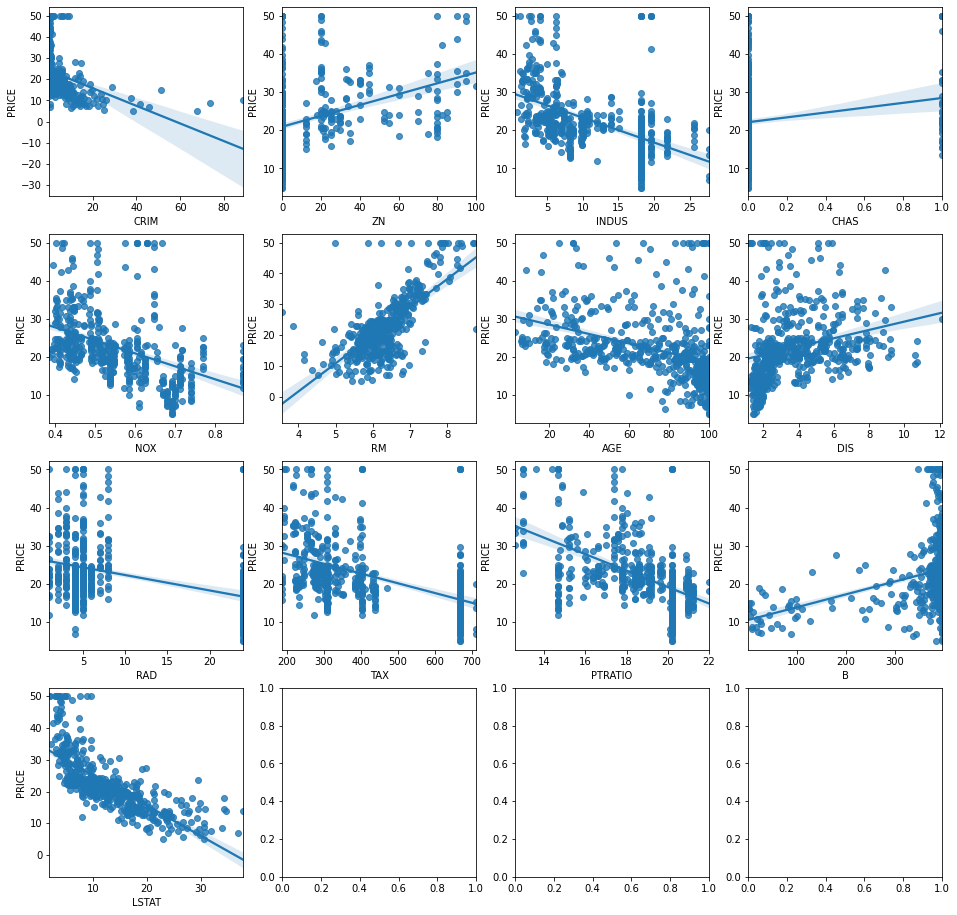

In [48]:
# 데이터 조사
# 시각화
# 2행 4열, axs는 4x2 개의 ax를 갖음
# 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
#사이즈가 4,4 전체 크게를 16,16으로 잡은듯
for i, feature in enumerate(X.columns):
  #x컬럼의 이름이 들어있잖아요.
  row = int( i / 4 )
  #row의 0번째에 그림을 그려라, 1번째에.
  col = i % 4
  #컬럼으로 세로에 그림을 그려라.
  sns.regplot(x=feature, y='PRICE', data=df, ax=axes[row][col] )

  #x가 뭔지 row와 col이 뭔지 잘 모르겟음.



  #첫번째 표만 보면 범죄의 컬럼을 다뤘고 가격이 높을수록 범죄가 적고
  #가격이 낮을수록 범죄가 많음,

In [ ]:
plt.subplots(4, 4, figsize=(16, 16))
plt.show()

In [49]:
print(row)

3


In [50]:
col

0

In [51]:
x

array([[ 1.70141562],
       [ 1.66439506],
       [ 0.48954183],
       [ 2.65620849],
       [-0.37642787],
       [ 0.73870644],
       [-0.73509808],
       [-2.59627244],
       [ 0.4635119 ],
       [-0.61137386],
       [ 1.74918526],
       [-2.22074834],
       [ 2.46612858],
       [-0.9768369 ],
       [ 0.88314763],
       [-0.59417306],
       [ 2.58452932],
       [-1.72427436],
       [ 1.98855922],
       [ 1.28458918],
       [-1.4389952 ],
       [ 2.06201901],
       [ 2.95888451],
       [ 2.1487474 ],
       [ 0.26315664],
       [ 0.02426486],
       [ 1.6367177 ],
       [ 0.13165236],
       [-2.93713353],
       [-1.29021228],
       [ 1.68747894],
       [-2.77671842],
       [ 1.09832476],
       [ 1.31123758],
       [-1.82290663],
       [ 2.06623828],
       [-1.21134788],
       [-2.56232535],
       [ 2.05167018],
       [ 1.89730935],
       [-0.93759629],
       [ 2.24724102],
       [-0.47738673],
       [-2.2745897 ],
       [-1.86537665],
       [-2

In [ ]:
#실습05

In [52]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [54]:
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#랜덤스테이트는 0혹은 42로 하라네

#뒤에있는 숫자번호는 42번째 랜덤값을 가지고 0, 42번을 섞어주는건데, 30이든 뭐든 사용이 가능하고
#데이터가 어떻게 생겼는지와, 에 따라 다를 수 있음.

train test split을 할 때

random_state을 안써주면 한번 한번 컴파일을 해줄 때 마다 train set과 test set이 바뀌는데 

random state에 아무 숫자나 넣어주면 매번 컴파일 해줄 때마다 train과 test set이 변경이 안되용.


예를들어 

[1234568910]이런 리스트(숫자사이에 쉼표는 귀찮아서 생략)에서 test size를 0.2로 했을 때, 2개가 테스트 셋이 되는데 random state에 아무 값이나 넣어주면 매번 test set이 9,10이렇게 정해져서 컴파일 할 때마다 정확도값이 바뀌지 않습니당

In [55]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

#0과 1사이의 값을 회귀 모델로 나오게 함
#정확도가 77 뭐 이런식으로

0.7749386253376939

In [56]:
model.score(X_test, y_test)

0.7404730371215744

In [ ]:
#분류인지 회귀인지 모를때 이것저것 써볼 수 있는데

#Y값이 숫자일때는 회귀모델을 한번 써보아라
#다중분류일때는 전혀 다르다.

In [ ]:
#실습06

In [57]:
# from sklearn.datasets import load_boston
# X, y 값을 가지고 선형회귀 적용하여 학습점수와, 테스트 점수를 비교하세요.
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [64]:
print(X,y)

[[0.00000000e+00 1.80000000e-01 6.78152493e-02 ... 1.00000000e+00
  8.96799117e-02 8.04248656e-03]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 ... 1.00000000e+00
  2.04470199e-01 4.18080621e-02]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 ... 9.79579831e-01
  6.28144504e-02 4.02790570e-03]
 ...
 [6.11892474e-04 0.00000000e+00 4.20454545e-01 ... 1.00000000e+00
  1.07891832e-01 1.16406475e-02]
 [1.16072990e-03 0.00000000e+00 4.20454545e-01 ... 9.82676920e-01
  1.29930407e-01 1.71795127e-02]
 [4.61841693e-04 0.00000000e+00 4.20454545e-01 ... 1.00000000e+00
  1.69701987e-01 2.87987643e-02]] [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2

In [58]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9520519609032727

In [59]:
model.score(X_test, y_test)

0.607472195966557

In [ ]:
#다른 예제로

In [60]:
from sklearn.datasets import load_iris

iris = load_iris()

In [66]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [67]:
X = iris.data[:, 0] # 꽃받침 길이
y = iris.data[:, 2] # 꽃잎 길이
X[:5], y[:5]

(array([5.1, 4.9, 4.7, 4.6, 5. ]), array([1.4, 1.4, 1.3, 1.5, 1.4]))

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1),
                                                    y,
                                                    random_state=0)
X_train.shape

(112, 1)

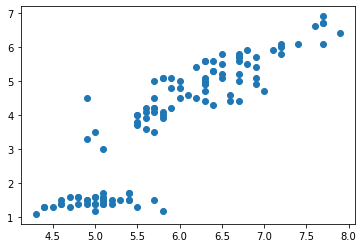

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt

#두 가지 특성을 시각화 
plt.scatter(X_train, y_train)

In [70]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.7864459990171911

In [71]:
model.score(X_test, y_test)

0.6634802872219325

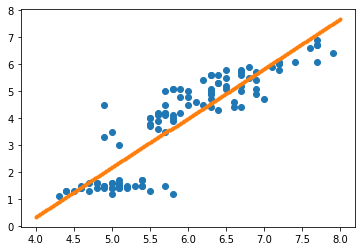

In [72]:
plt.scatter(X_train, y_train)
xx = np.linspace(4, 8, 200)
#linspace 4부터 8사이 200개의 1차원배열을 생성
yy = model.coef_ * xx + model.intercept_
#모델w파라미터 *1차원무작위x값 +바이어스
#해서 가장 적절한 선을 구해줌.
plt.scatter(x = xx, y = yy, marker='.')

In [73]:
xx

array([4.        , 4.0201005 , 4.04020101, 4.06030151, 4.08040201,
       4.10050251, 4.12060302, 4.14070352, 4.16080402, 4.18090452,
       4.20100503, 4.22110553, 4.24120603, 4.26130653, 4.28140704,
       4.30150754, 4.32160804, 4.34170854, 4.36180905, 4.38190955,
       4.40201005, 4.42211055, 4.44221106, 4.46231156, 4.48241206,
       4.50251256, 4.52261307, 4.54271357, 4.56281407, 4.58291457,
       4.60301508, 4.62311558, 4.64321608, 4.66331658, 4.68341709,
       4.70351759, 4.72361809, 4.74371859, 4.7638191 , 4.7839196 ,
       4.8040201 , 4.8241206 , 4.84422111, 4.86432161, 4.88442211,
       4.90452261, 4.92462312, 4.94472362, 4.96482412, 4.98492462,
       5.00502513, 5.02512563, 5.04522613, 5.06532663, 5.08542714,
       5.10552764, 5.12562814, 5.14572864, 5.16582915, 5.18592965,
       5.20603015, 5.22613065, 5.24623116, 5.26633166, 5.28643216,
       5.30653266, 5.32663317, 5.34673367, 5.36683417, 5.38693467,
       5.40703518, 5.42713568, 5.44723618, 5.46733668, 5.48743

꽃잎 길이와 꽂잎 너비를 이용한 선형회귀

In [74]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [75]:
X = iris.data[:, 2] # 꽃잎 길이
y = iris.data[:, 3] # 꽃잎 너비
X[:5], y[:5]

(array([1.4, 1.4, 1.3, 1.5, 1.4]), array([0.2, 0.2, 0.2, 0.2, 0.2]))

In [76]:
#두 가지 특성을 시각화

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1),
                                                    y,
                                                    random_state=0)
X_train.shape

(112, 1)

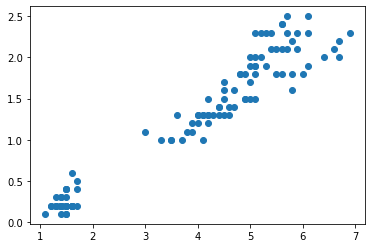

In [77]:
plt.scatter(X_train, y_train)


In [79]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9358824215964661

In [81]:
model.score(X_test, y_test) 

0.8931453922584154

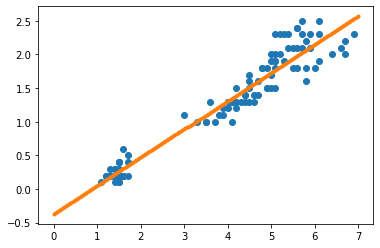

In [82]:
plt.scatter(X_train, y_train)
xx = np.linspace(0, 7, 200)
yy = model.coef_ * xx + model.intercept_
plt.scatter(x=xx, y=yy, marker='.')